<br><br>

## 계절성 시계열 데이터에 대한 분석 : SARIMA

SARIMA : 데이터가 지닌 계절성(주기에 따라 유사한 양상으로 변화하는 모양)까지 고려한 ARIMA 모델


### 데이터 로드

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./data/arima_data.csv', names = ['day', 'price'])
data['day'] = pd.to_datetime(data['day'], format = '%Y-%m-%d')
data.set_index('day', inplace=True)
s_data = data

In [6]:
s_data

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190
2013-04-01,5783
2013-05-01,6298
2013-06-01,6739
2013-07-01,7107
2013-08-01,6492
2013-09-01,5693


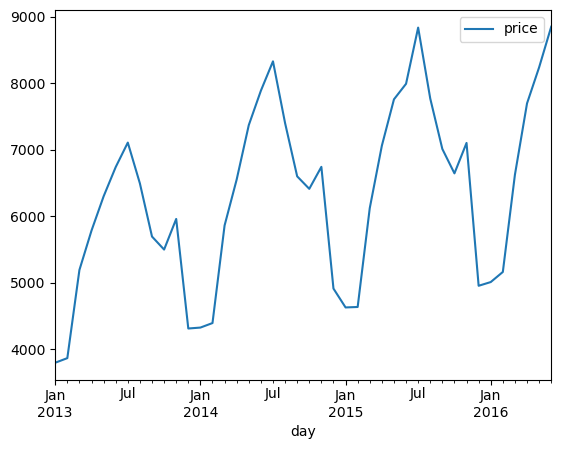

In [8]:
train_len = int(len(s_data)*0.7)
training = s_data[:train_len]
test = s_data.drop(training.index)

training.plot()
plt.show()

> SARIMAX(endog, order=(1,1,1), seasonal_order=(1,1,1,12),<br>
&emsp; &emsp; &emsp; &emsp; enforce_stationarity=False, enforce_invertibility=False)

* endog : 시계열 y값<br>
* order ((p,d,q), optional) : 각각 AR, diff, and MA 값
* seasonal_order ((P,D,Q,s), optional) : s는 계절의 기간 수를 제공하는 정수
* trend (str{'n','c','t','ct'}, optional) : 'n'은 없음,  'c'는 상수, 't'는 선형 추세, 'ct'는 둘 다

In [11]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(training.price.values,
               order = (1,1,1), seasonal_order = (1,1,1,12),
               trend = 'ct', 
               enforce_stationarilty = False,
               enforce_invertibility = False)
results = model.fit()
results.summary()

C:\Users\LG\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\LG\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   42
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -193.993
Date:                            Mon, 22 May 2023   AIC                            401.986
Time:                                    16:01:54   BIC                            411.557
Sample:                                         0   HQIC                           404.984
                                             - 42                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -59.0706    561.458     -0.105      0.916   -1159.509    1041.367
drift          3.1161     16.375      0.190      0.849     -28.978      35.210
ar.L1         -0.5865      0.732     -0.801      0.423      -2.022       0.849
ma.L1          0.3709      0.842      0.440      0.660      -1.280       2.022
ar.S.L12      -0.9981      7.024     -0.142      0.887     -14.764      12.768
ma.S.L12       0.9909     17.645      0.056      0.955     -33.594      35.575
sigma2      3.729e+04   4.01e+05      0.093      0.926   -7.49e+05    8.24e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.99
Prob(Q):                              0.98   Prob(JB):                         0.61
Heteroskedasticity (H):               1.27   Skew:                            -0.01
Prob(H) (two-sided):                  0.71   Kurtosis:                         2.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.6e+14. Standard errors may be unstable.
"""